# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

### Your tasks
* Import data from the provided [GitHub repo](https://github.com/udacity/CD13649-Project/tree/main/Project) using `pandas`. For your convenience, the data files (CSVs) are also present in the current workspace at the path **CD13649-Project/Project/**. Here are the data files to import: 
  1. GDP (**GDP.csv**)
  2. Inflation (**inflation_monthly.csv**)
  3. Apple stock prices (**apple_historical_data.csv**)
  4. Microsoft stock prices (**microsoft_historical_data.csv**)
  5. Consumer price index (**consumer_price_index.csv**)



* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`


* You may need to change column names to make them easier to work with


* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method



In [57]:
# Load historical GDP data
gdp_data = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/GDP.csv')
inflation_data = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/inflation_monthly.csv')
consumer_price_index_data = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/consumer_price_index.csv')


In [58]:
# Check the first few rows of data
print(gdp_data.head())
print(inflation_data.head())
print(consumer_price_index_data.head())

         DATE      GDP
0  1947-01-01  243.164
1  1947-04-01  245.968
2  1947-07-01  249.585
3  1947-10-01  259.745
4  1948-01-01  265.742
         DATE  CORESTICKM159SFRBATL
0  1968-01-01              3.651861
1  1968-02-01              3.673819
2  1968-03-01              4.142164
3  1968-04-01              4.155828
4  1968-05-01              4.088245
         DATE  CORESTICKM159SFRBATL
0  1968-01-01              3.651861
1  1968-02-01              3.673819
2  1968-03-01              4.142164
3  1968-04-01              4.155828
4  1968-05-01              4.088245


In [59]:
# Load the historical stock price data for Apple and Microsoft
apple_data = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/apple_historical_data.csv')
microsoft_data = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/microsoft_historical_data.csv')

In [60]:
# Check the first few rows of data
print(apple_data.head())
print(microsoft_data.head())

        Date Close/Last     Volume      Open      High       Low
0   5/3/2024   $183.38   163224100  $186.65   $187.00   $182.66 
1   5/2/2024   $173.03    94214920  $172.51   $173.42   $170.89 
2   5/1/2024   $169.30    50383150  $169.58   $172.71   $169.11 
3  4/30/2024   $170.33    65934780  $173.33   $174.99   $170.00 
4  4/29/2024   $173.50    68169420  $173.37   $176.03   $173.10 
         Date Close/Last    Volume     Open       High        Low
0  05/03/2024    $406.66  17446720  $402.28    $407.15    $401.86
1  05/02/2024    $397.84  17709360  $397.66    $399.93  $394.6515
2  05/01/2024    $394.94  23562480  $392.61  $401.7199    $390.31
3  04/30/2024    $389.33  28781370  $401.49    $402.16    $389.17
4  04/29/2024    $402.25  19582090  $405.25    $406.32    $399.19


In [61]:
# Use methods like .info() and .describe() to explore the data
print(gdp_data.info())
print(gdp_data.describe())
print(inflation_data.info())
print(inflation_data.describe())
print(consumer_price_index_data.info())
print(consumer_price_index_data.describe())
print(apple_data.info())
print(apple_data.describe())
print(microsoft_data.info())
print(microsoft_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    309 non-null    object 
 1   GDP     309 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB
None
                GDP
count    309.000000
mean    7227.754935
std     7478.297734
min      243.164000
25%      804.981000
50%     4386.773000
75%    12527.214000
max    28284.498000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  675 non-null    object 
 1   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB
None
       CORESTICKM159SFRBATL
count            675.000000
mean               4.331276
std                2.694022
min                0.663868
25%  

## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [62]:
# Check for nulls 
# Check for nulls in Apple data
print("Null values in Apple stock data:")
print(apple_data.isnull().sum())

# Check for nulls in Microsoft data
print("\nNull values in Microsoft stock data:")
print(microsoft_data.isnull().sum())


Null values in Apple stock data:
Date          0
Close/Last    3
Volume        0
Open          0
High          0
Low           0
dtype: int64

Null values in Microsoft stock data:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [63]:
# Forward fill any missing data
apple_data.ffill(inplace=True)

In [64]:
# Check again for nulls after using forward fill
print("Null values in Apple stock data:")
print(apple_data.isnull().sum())

Null values in Apple stock data:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [65]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    for col in numeric_columns:
        df[col] = df[col].replace('[\$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [66]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
convert_dollar_columns_to_numeric(apple_data, ['Open', 'High', 'Low', 'Close/Last'])
convert_dollar_columns_to_numeric(microsoft_data, ['Open', 'High', 'Low', 'Close/Last'])

print(apple_data.head())
print(microsoft_data.head())



        Date  Close/Last     Volume    Open    High     Low
0   5/3/2024      183.38  163224100  186.65  187.00  182.66
1   5/2/2024      173.03   94214920  172.51  173.42  170.89
2   5/1/2024      169.30   50383150  169.58  172.71  169.11
3  4/30/2024      170.33   65934780  173.33  174.99  170.00
4  4/29/2024      173.50   68169420  173.37  176.03  173.10
         Date  Close/Last    Volume    Open      High       Low
0  05/03/2024      406.66  17446720  402.28  407.1500  401.8600
1  05/02/2024      397.84  17709360  397.66  399.9300  394.6515
2  05/01/2024      394.94  23562480  392.61  401.7199  390.3100
3  04/30/2024      389.33  28781370  401.49  402.1600  389.1700
4  04/29/2024      402.25  19582090  405.25  406.3200  399.1900


In [67]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format
apple_data["Date"] = pd.to_datetime(apple_data["Date"])
microsoft_data["Date"] = pd.to_datetime(microsoft_data["Date"])


In [68]:
# Use .info() and check the type of each column to ensure that the above steps worked
print(apple_data.info())
print(microsoft_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64

## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [69]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
inflation_data['DATE'] = pd.to_datetime(inflation_data['DATE']) + pd.offsets.MonthEnd(0)
inflation_data.head()


,DATE,CORESTICKM159SFRBATL
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [70]:
# Upsample and interpolate from monthly to weekly 
inflation_data.set_index('DATE', inplace=True)
inflation_data = inflation_data.resample('W').interpolate(method='linear')


In [71]:
# Downsample from monthly to quarterly 
# Downsample from monthly to quarterly 
inflation_quarterly = inflation_data.resample("Q").mean().copy()
inflation_quarterly.head()  # Check the first few rows of the new quarterly dataS


,CORESTICKM159SFRBATL
DATE,
1968-03-31,4.142164
1968-06-30,4.359382
1968-09-30,4.760065
1968-12-31,5.158414
1969-03-31,5.556764


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [72]:
# Standardize the GDP measure
gdp_data["GDP_standardized"] = (gdp_data["GDP"] - gdp_data["GDP"].mean()) / gdp_data["GDP"].std()


In [73]:
# Check the dataframe to make sure the calculation worked as expected 
gdp_data.head()  # Check the first few rows of the new quarterly data


,DATE,GDP,GDP_standardized
0,1947-01-01,243.164,-0.933981
1,1947-04-01,245.968,-0.933606
2,1947-07-01,249.585,-0.933123
3,1947-10-01,259.745,-0.931764
4,1948-01-01,265.742,-0.930962


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [74]:
# Get max date in timeseries
latest_date_appl = apple_data["Date"].max()
latest_date_msft = microsoft_data["Date"].max()

In [75]:
# Use the max date calculated above to get the last three months of data in the dataset 
# Check the last three months of data for Apple 
cutoff_date_appl = latest_date_appl - pd.DateOffset(months=3)
last_3_months_appl = apple_data[apple_data["Date"] >= cutoff_date_appl]

# Check the last three months of data for Microsoft
cutoff_date_msft = latest_date_msft - pd.DateOffset(months=3)
last_3_months_msft = microsoft_data[microsoft_data["Date"] >= cutoff_date_msft]


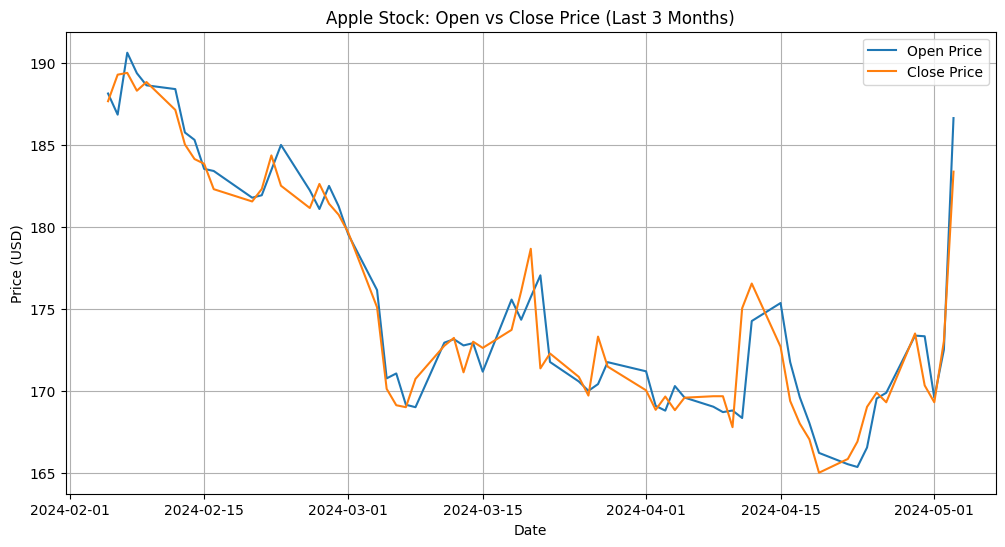

In [76]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data for Apple
plt.figure(figsize=(12, 6))
plt.plot(last_3_months_appl["Date"], last_3_months_appl["Open"], label="Open Price")
plt.plot(last_3_months_appl["Date"], last_3_months_appl["Close/Last"], label="Close Price")

plt.title("Apple Stock: Open vs Close Price (Last 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
# Set y-axis ticks every $10
ax = plt.gca()  # get current axis

plt.show()



## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

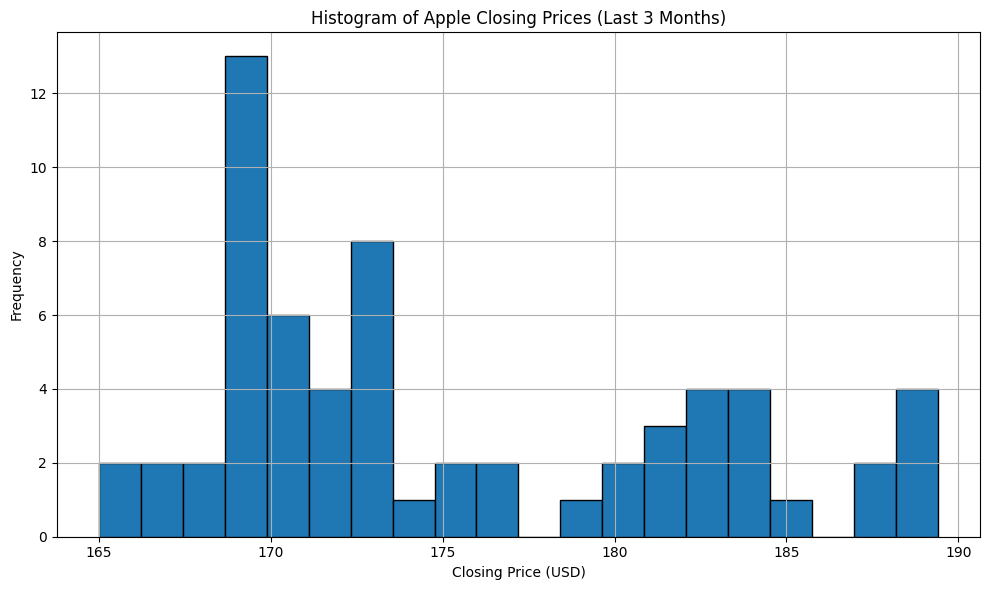

In [77]:
# Plot the histogram of Apple's closing price over the last 3 months 
plt.figure(figsize=(10, 6))
plt.hist(last_3_months_appl["Close/Last"], bins=20
         , edgecolor='black')

plt.title("Histogram of Apple Closing Prices (Last 3 Months)")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [78]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
apple_data.set_index('Date', inplace=True)
apple_data.sort_index(inplace=True)
microsoft_data.set_index('Date', inplace=True)
microsoft_data.sort_index(inplace=True)
# Calculate daily returns for Apple and Microsoft
apple_data['AAPL_Return'] = apple_data['Close/Last'].pct_change()
microsoft_data['MSFT_Return'] = microsoft_data['Close/Last'].pct_change()
inflation_data['Inflation_Return'] = inflation_data['CORESTICKM159SFRBATL'].pct_change()

apple_data['AAPL_LogReturn'] = np.log(apple_data['Close/Last'] / apple_data['Close/Last'].shift(1))
microsoft_data['MSFT_LogReturn'] = np.log(microsoft_data['Close/Last'] / microsoft_data['Close/Last'].shift(1))
inflation_data['Inflation_LogReturn'] = np.log(inflation_data['CORESTICKM159SFRBATL'] / inflation_data['CORESTICKM159SFRBATL'].shift(1))

### 2. Interpolate stock returns from daily to monthly

In [79]:
#option 1 use arithmetic returns
aapl_monthly_arith = (1 + apple_data['AAPL_Return']).resample('M').prod() - 1
msft_monthly_arith = (1 + microsoft_data['MSFT_Return']).resample('M').prod() - 1

# option 2 use compound returns
aapl_monthly_log = apple_data['AAPL_LogReturn'].resample('M').sum()
msft_monthly_log = microsoft_data['MSFT_LogReturn'].resample('M').sum()

aapl_monthly_comp = np.exp(aapl_monthly_log) - 1
msft_monthly_comp = np.exp(msft_monthly_log) - 1

#aapl_monthly = apple_data['AAPL_Return'].resample('M').mean()
#msft_monthly = microsoft_data['MSFT_Return'].resample('M').mean()

### 3. Merge the dataframes and calculate / plot the correlation

In [81]:
combined_data = pd.DataFrame({
    'AAPL_Return_arith': aapl_monthly_arith,
    'MSFT_Return_arith': msft_monthly_arith,
    'AAPL_Return_comp': aapl_monthly_comp,
    'MSFT_Return_comp': msft_monthly_comp,
    'Inflation_Return': inflation_data['Inflation_Return']
})
combined_data.dropna(inplace=True)  # Drop rows with NaN values

### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [82]:
# Calculate correlation matrix
correlation_matrix = combined_data.corr()

### 5. Plot the correlation matrix as a heatmap 

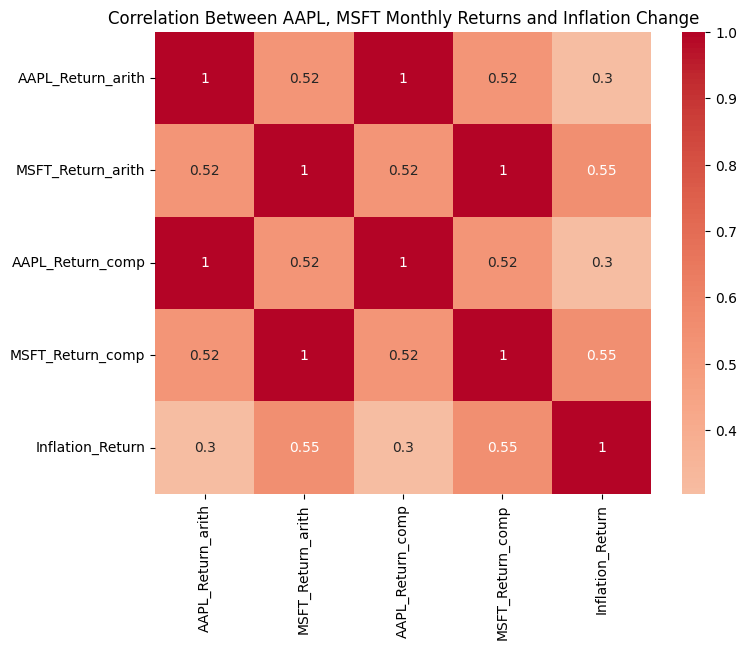

In [83]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between AAPL, MSFT Monthly Returns and Inflation Change')
plt.show()

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [84]:
# Define the window size for the rolling calculation (e.g., one week)
window_size = 5

In [94]:
# Calculate rolling one-week volatility
# Make explicit copies to avoid SettingWithCopyWarning
last_3_months_appl = last_3_months_appl.copy()
last_3_months_msft = last_3_months_msft.copy()

#caluculate returns
last_3_months_appl['AAPL_Return'] = last_3_months_appl['Close/Last'].pct_change()
last_3_months_appl['AAPL_LogReturn'] = np.log(last_3_months_appl['Close/Last'] / last_3_months_appl['Close/Last'].shift(1))

last_3_months_msft['MSFT_Return'] = last_3_months_msft['Close/Last'].pct_change()
last_3_months_msft['MSFT_LogReturn'] = np.log(last_3_months_msft['Close/Last'] / last_3_months_msft['Close/Last'].shift(1))

# Now safe to assign new columns
last_3_months_appl['AAPL_Volatility_Return'] = last_3_months_appl['AAPL_Return'].rolling(window=window_size).std()
last_3_months_msft['MSFT_Volatility_Return'] = last_3_months_msft['MSFT_Return'].rolling(window=window_size).std()

last_3_months_appl['AAPL_Volatility_Return_Log'] = last_3_months_appl['AAPL_LogReturn'].rolling(window=window_size).std()
last_3_months_msft['MSFT_Volatility_Return_Log'] = last_3_months_msft['MSFT_LogReturn'].rolling(window=window_size).std()

print(type(last_3_months_appl.index))

<class 'pandas.core.indexes.base.Index'>


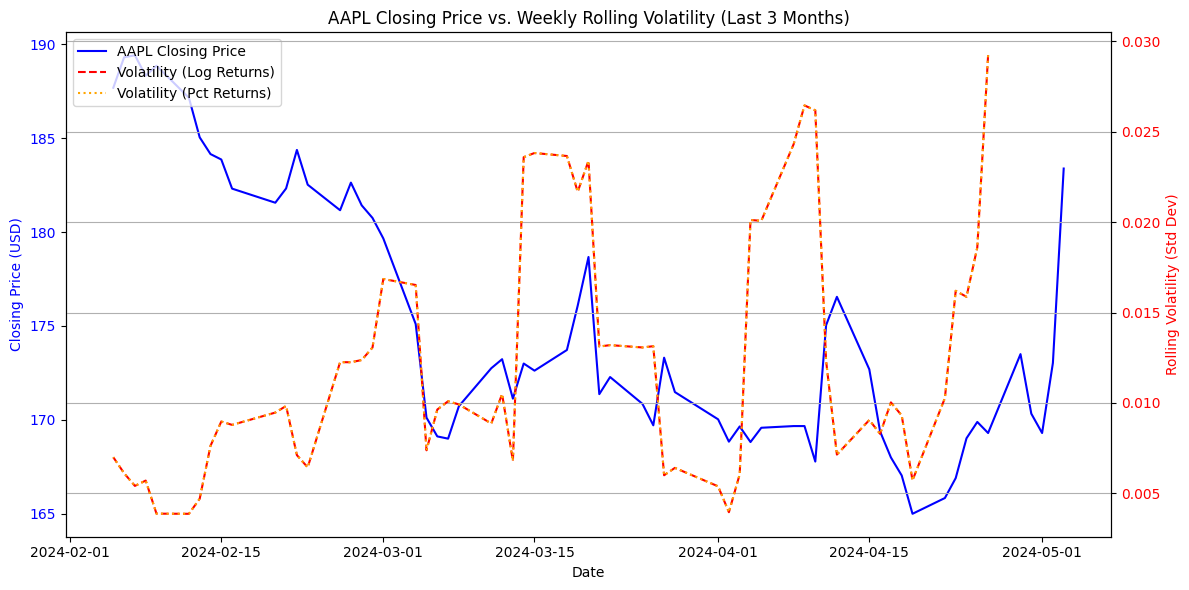

In [96]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes
# Create the figure and the first axis (left y-axis for closing price)

# Ensure 'Date' is in datetime format
if 'Date' in last_3_months_appl.columns:
    last_3_months_appl['Date'] = pd.to_datetime(last_3_months_appl['Date'])
    last_3_months_appl.set_index('Date', inplace=True)


# Create figure and first axis for AAPL Closing Price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: AAPL Closing Price
ax1.plot(
    last_3_months_appl.index,
    last_3_months_appl['Close/Last'],
    color='blue',
    label='AAPL Closing Price'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right Y-axis: Volatility from log and regular returns
ax2 = ax1.twinx()

# Log-return-based volatility
ax2.plot(
    last_3_months_appl.index,
    last_3_months_appl['AAPL_Volatility_Return'],
    color='red',
    linestyle='--',
    label='Volatility (Log Returns)'
)

# Regular-return-based volatility
ax2.plot(
    last_3_months_appl.index,
    last_3_months_appl['AAPL_Volatility_Return'],
    color='orange',
    linestyle=':',
    label='Volatility (Pct Returns)'
)

ax2.set_ylabel('Rolling Volatility (Std Dev)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('AAPL Closing Price vs. Weekly Rolling Volatility (Last 3 Months)')
fig.tight_layout()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [35]:
apple_data.to_csv('apple_historical_data_cleaned.csv', index=False)
microsoft_data.to_csv('microsoft_historical_data_cleaned.csv', index=False)
gdp_data.to_csv('GDP_cleaned.csv', index=False)
inflation_data.to_csv('inflation_monthly_cleaned.csv', index=False)
last_3_months_appl.to_csv('last_3_months_appl.csv', index=False)
last_3_months_msft.to_csv('last_3_months_msft.csv', index=False)
inflation_quarterly.to_csv('inflation_quarterly.csv', index=False)
consumer_price_index_data.to_csv('consumer_price_index_cleaned.csv', index=False)
combined_data.to_csv('combined_data.csv', index=False)